<a href="https://colab.research.google.com/github/timidsurgeon/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## @channel Hey everyone! Today we'll be starting off with a Walkie-Talkie. In Walkie-Talkies you'll be split into small groups where you answer the questions posted in this channel. Half of your career (especially interviews) as a data scientist will be about communicating and explaining your ideas to others. This helps you prepare for that and review material, as well as build community across our cohort. Today's your first one, so the questions will be about getting you used to the format and thinking about what it is you're doing as a data scientist.

#### Question 1: What are numpy and pandas and what are they used for?

Numpy and pandas are both libraries that are integrated well into the Python language. They are used for data analysis and visualization. Pandas offers easy-to-use data structures and data analysis tools. Numpy allows for array manipulation, and integrates the use of linear algebra. 

#### Question 2: What is data science to you?

Data science is the use of data to extract knowledge and insights. It encompasses the use of statistical models and data analysis. Data scientists source, manage, and analyze large amounts of data. 

#### Question 3: What made you transition into data science?

The ability to be able to "forcast" well into the future using statistics and to be able to arrive at meaningful conclusions was something that really interested me about the field. I find it really intriguing to be able to come across patterns that were not apparent before making the analysis and visualizations. 

#### Question 4: What is the most confusing topic from week one of class?

The most confusing topic was the part of the lecture that dealt with merging two datasets together. 

#### Question 5: What would you love to acquire if there were no limitations?

I would love th acquire the ability to pick and memorize all the different functions easily without having to constantly look back at my notes for clarification. I find myself having to constantly look back and forth between my notes and the assignments because of the syntax. 

#### Question 6: What would you do with that data (projects, startups, apps)?

I would look into working on projects with the data and seeing what type of conclusions I can derive from the information. Hopefully, they are meaningful-enough conclusions that I can use to better the life and quality of life of myself and others. 

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [1]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
# tuples are immutable
from collections import namedtuple

User = namedtuple('User', ['purchased','time_on_site', 'mobile'])
example_user = User(False, 12, False)
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [6]:
# can't change a tuple once it's set
example_user.time_on_site = 30

AttributeError: ignored

In [57]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [58]:
# random number (float) generation between 10 and 600
random.uniform(10, 600)

526.3843431789132

In [0]:
import numpy as np

In [60]:
# random number within the normal distribution with a mean of 10
np.random.normal(10,2)

13.954824319524272

In [61]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  time_on_site = random.uniform(10, 600)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = random.uniform(5, 300)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
print(users[:10])

[User(purchased=True, time_on_site=218.4526754049901, mobile=True), User(purchased=False, time_on_site=229.7798096405732, mobile=True), User(purchased=False, time_on_site=185.74965622252108, mobile=True), User(purchased=False, time_on_site=230.60752314664245, mobile=True), User(purchased=True, time_on_site=63.49278225469485, mobile=True), User(purchased=False, time_on_site=131.92632437871737, mobile=True), User(purchased=False, time_on_site=155.6102563423423, mobile=True), User(purchased=True, time_on_site=288.0658424929293, mobile=True), User(purchased=False, time_on_site=293.718168853473, mobile=True), User(purchased=True, time_on_site=169.1229927634814, mobile=True)]


In [62]:
# prints the users going down instead of using the print statement which prints 
# out side to side 
users[:10]

[User(purchased=True, time_on_site=218.4526754049901, mobile=True),
 User(purchased=False, time_on_site=229.7798096405732, mobile=True),
 User(purchased=False, time_on_site=185.74965622252108, mobile=True),
 User(purchased=False, time_on_site=230.60752314664245, mobile=True),
 User(purchased=True, time_on_site=63.49278225469485, mobile=True),
 User(purchased=False, time_on_site=131.92632437871737, mobile=True),
 User(purchased=False, time_on_site=155.6102563423423, mobile=True),
 User(purchased=True, time_on_site=288.0658424929293, mobile=True),
 User(purchased=False, time_on_site=293.718168853473, mobile=True),
 User(purchased=True, time_on_site=169.1229927634814, mobile=True)]

In [63]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,218.452675,True
1,False,229.779810,True
2,False,185.749656,True
3,False,230.607523,True
4,True,63.492782,True


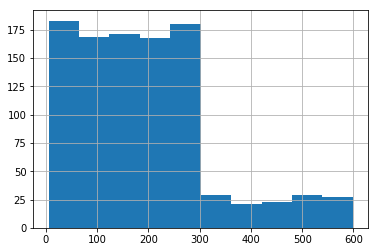

In [64]:
user_data.time_on_site.hist();

In [65]:
# updating to time on site from random.uniform random.normal

users = []

for _ in range(250):
  # Desktop users
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  time_on_site = np.random.normal(7.5*60, 2*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=True, time_on_site=318.3640285597411, mobile=True),
 User(purchased=False, time_on_site=427.2532236812679, mobile=True),
 User(purchased=False, time_on_site=220.56271151658356, mobile=True),
 User(purchased=True, time_on_site=795.3728267954714, mobile=False),
 User(purchased=False, time_on_site=528.7558737942645, mobile=True),
 User(purchased=True, time_on_site=639.6960727399473, mobile=True),
 User(purchased=False, time_on_site=676.9181888612125, mobile=False),
 User(purchased=True, time_on_site=875.5533222446513, mobile=False),
 User(purchased=False, time_on_site=277.87277135238514, mobile=False),
 User(purchased=False, time_on_site=372.0560239773448, mobile=False)]

In [66]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

,purchased,time_on_site,mobile
0,True,318.364029,True
1,False,427.253224,True
2,False,220.562712,True
3,True,795.372827,False
4,False,528.755874,True


In [67]:
# added time_on_site_min column to dataframe
user_data['time_on_site_min'] = user_data['time_on_site'] / 60 
user_data.head()

,purchased,time_on_site,mobile,time_on_site_min
0,True,318.364029,True,5.306067
1,False,427.253224,True,7.120887
2,False,220.562712,True,3.676045
3,True,795.372827,False,13.256214
4,False,528.755874,True,8.812598


In [0]:
import matplotlib.pyplot as plt

TypeError: ignored

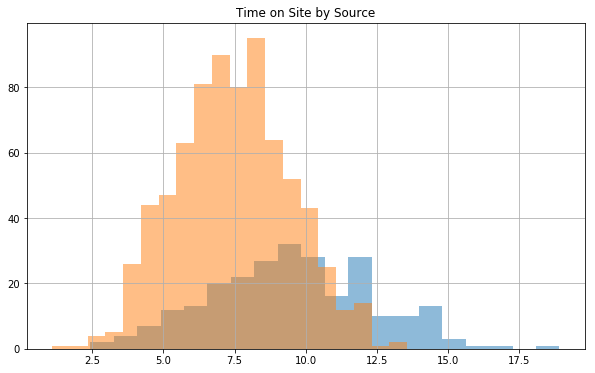

In [76]:
user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Time on Site by Source');
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop','Mobile']);

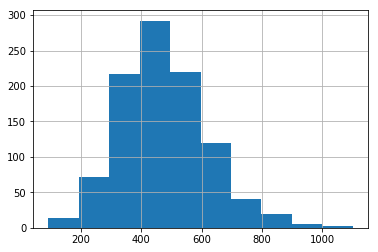

In [34]:
user_data.time_on_site.hist();

In [0]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site,5.395806383057993,5.457727420381445,6.012980358659168,6.370819673044487,6.526220869482321,6.618506115477453,6.744300972093091,6.937814523764514,7.022230321283178,7.738183255456649,...,570.7205763776294,572.579212329361,573.071762294419,577.5607756708825,578.0265919014007,578.8349054472059,584.0914381586123,586.960469433746,588.7975083689481,599.8083961016524
purchased,,,,,,,,,,,,,,,,,,,,,
False,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,0,1,1
True,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,1,0,0


In [0]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site'], 5)  # 5 equal-sized bins
pd.crosstab(user_data['purchased'], time_bins)

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,240,233,105,29,28
True,96,131,102,20,16


In [0]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(user_data['purchased'], time_bins, normalize='columns')

time_on_site,"(4.801, 124.278]","(124.278, 243.161]","(243.161, 362.043]","(362.043, 480.926]","(480.926, 599.808]"
purchased,,,,,
False,0.714286,0.64011,0.507246,0.591837,0.636364
True,0.285714,0.35989,0.492754,0.408163,0.363636


In [0]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile,False,True
purchased,,
False,0.672,0.622667
True,0.328,0.377333


In [0]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

## Link to lecture
https://youtu.be/rcnSkpbRQh0